In [1]:
%matplotlib inline

# Simple Oscillator Example

This example shows the most simple way of using a solver.
We solve free vibration of a simple oscillator:
$$m \ddot{u} + k u = 0,\quad u(0) = u_0,\quad \dot{u}(0) = \dot{u}_0$$
using the CVODE solver, which means we use a rhs function of $\dot{u}$.
Solution:
$$u(t) = u_0 \cos\left(\sqrt{\frac{k}{m}} t\right)+\frac{\dot{u}_0}{\sqrt{\frac{k}{m}}} \sin\left(\sqrt{\frac{k}{m}} t\right)$$

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
from numpy import asarray, cos, sin, sqrt, linspace
from scikits.odes import ode

In [3]:
#data of the oscillator
k = 4.0
m = 1.0
#initial position and speed data on t=0, x[0] = u, x[1] = \dot{u}, xp = \dot{x}
initx = [1, 0.1]

We need a first order system, so convert the second order system 
$$m \ddot{u} + k u = 0,\quad u(0) = u_0,\quad \dot{u}(0) = \dot{u}_0$$
into 
$$\left\{ \begin{array}{l}
  \dot u = v\\
  \dot v = \ddot u = -\frac{ku}{m}
\end{array} \right.$$

In [4]:
# right hand side equation of the ODE system
def rhseqn(t, x, xdot):
    """ we create rhs equations for the problem"""
    xdot[0] = x[1]
    xdot[1] = - k/m * x[0]

In [5]:
#solve the problem
solver = ode('cvode', rhseqn, old_api=False)
result = solver.solve([0., 1., 2.], initx).values

In [6]:
print('\n   t        Solution          Exact')
print('------------------------------------')
for t, u in zip(result.t, result.y):
    print('%4.2f %15.6g %15.6g' % (t, u[0], initx[0]*cos(sqrt(k/m)*t)+initx[1]*sin(sqrt(k/m)*t)/sqrt(k/m)))



   t        Solution          Exact
------------------------------------
0.00               1               1
1.00       -0.370694       -0.370682
2.00       -0.691508       -0.691484


In [7]:
#Solve over the next hour by continuation
times = linspace(0, 3600, 61)
times[0] = result.t[-1]
solution = solver.solve(times, result.y[-1])
if solution.errors.t:
    print ('Error: ', solution.message, 'Error at time', solution.errors.t)
result = solution.values
print ('Computed Solutions:')
print('\n   t        Solution          Exact')
print('------------------------------------')
for t, u in zip(result.t, result.y):
    print('%4.2f %15.6g %15.6g' % (t, u[0], initx[0]*cos(sqrt(k/m)*t)+initx[1]*sin(sqrt(k/m)*t)/sqrt(k/m)))


Error:  Could not reach endpoint Error at time 24.5780834078
Computed Solutions:

   t        Solution          Exact
------------------------------------
2.00       -0.691508       -0.691484


In [8]:
# The error is due to mxsteps, increase it!
solver = ode('cvode', rhseqn, old_api=False, max_steps=5000)
solution = solver.solve(times, result.y[-1])
if solution.errors.t:
    print ('Error: ', solution.message, 'Error at time', solution.errors.t)
result = solution.values
print ('Computed Solutions:')
print('\n   t        Solution          Exact')
print('------------------------------------')
for t, u in zip(result.t, result.y):
    print('{0:>4.0f} {1:15.6g} {2:15.6g}'.format(t, u[0], initx[0]*cos(sqrt(k/m)*t)+initx[1]*sin(sqrt(k/m)*t)/sqrt(k/m)))


Computed Solutions:

   t        Solution          Exact
------------------------------------
   2       -0.691508       -0.691484
  60        0.843074        0.843212
 120        0.372884        0.373054
 180       -0.235749       -0.235745
 240       -0.756553       -0.756932
 300       -0.996027       -0.996814
 360       -0.865262       -0.866242
 420       -0.412897       -0.413742
 480        0.192583        0.192521
 540        0.726263        0.727236
 600        0.989879        0.991682
 660        0.885441        0.887581
 720        0.452113        0.453622
 780       -0.149122       -0.148921
 840       -0.694753       -0.696119
 900       -0.981996       -0.984613
 960       -0.904317       -0.907187
1020       -0.490547       -0.492616
1080        0.105433         0.10503
1140        0.661996        0.663643
1200        0.972376         0.97562
1260        0.921229        0.925021
1320        0.527762        0.530648
1380      -0.0616772      -0.0609338
1440       -0.6278

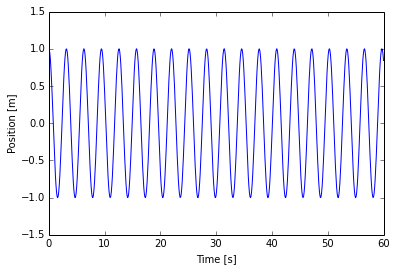

In [13]:
#plot of the oscilator
solver = ode('cvode', rhseqn, old_api=False)
times = linspace(0,60,600)
solution = solver.solve(times, initx)
result = solution.values
plt.plot(result.t,[x[0] for x in result.y])
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()